In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import model_selection, svm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
all_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/roman_urdu_all_data.csv')
all_df = all_df.astype(str)
print(all_df.shape)
y = all_df['Label']
y = y.astype(float)
y = y.astype(int)
print(y.shape)

Mounted at /content/drive
(9526, 8)
(9526,)


In [ ]:
bow_converter = CountVectorizer()
bow_x = bow_converter.fit_transform(all_df['text'])
print(bow_x.shape)

(9526, 28606)


In [ ]:
tfidf_transform = TfidfTransformer(norm=None)
tfidf_x = tfidf_transform.fit_transform(bow_x)
print(tfidf_x.shape)

(9526, 28606)


In [ ]:
pip install ReliefF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 5.1 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=09652a57543dc90aed8350f76035b4fbf1205389bff41fc6b84c447b692d152c
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [ ]:
pip install Py_FS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 16.2 MB/s 


In [ ]:
import Py_FS
X_train, X_test, y_train, y_test = train_test_split(tfidf_x, y, test_size=0.33, random_state=42)
np_tfidf_x = tfidf_x.toarray()
np_y = y.to_numpy()

GSA BASED WRAPPERS STARTED

Weight for the classification accuracy [0-1]: 0.9
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 25

------------- Best Agent ---------------
Fitness: 0.8173314890241988
Number of Features: 14433
----------------------------------------

Particle 1 - Fitness: 0.8173314890241988, Number of Features: 14433
Particle 2 - Fitness: 0.8148863610603049, Number of Features: 14322
Particle 3 - Fitness: 0.8109445152687389, Number of Features: 14369
Particle 4 - Fitness: 0.8085975329767037, Number of Features: 14365
Particle 5 - Fitness: 0.80660685512817, Number of Features: 14124
Particle 6 - Fitness: 0.806117447311628, Number of Features: 14264
Particle 7 - Fitness: 0.80571543374804, Number of Features: 14379
Particle 8 - Fitness: 0.8039527732828378, Number of Features: 14478
Particle 9 - Fitness: 0.8039522450657369, Number of Features: 14208
Particle 10 - Fitness: 0.8026233242037366, Number of Features: 14318
Particle

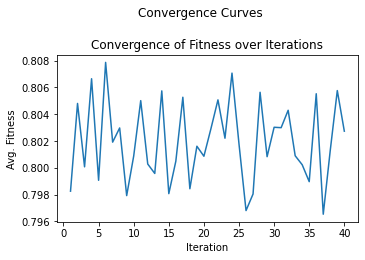

In [ ]:
solution_GSA = Py_FS.wrapper.nature_inspired.GSA(num_agents = 25, max_iter = 40, train_data = np_tfidf_x, train_label = np_y, save_conv_graph=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


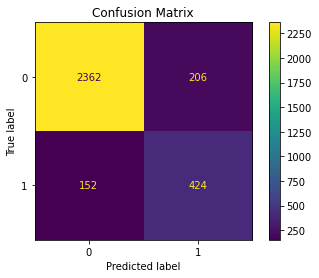

In [ ]:
res_GSA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GSA.best_agent ,classifier='svm', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GSA.f1_score}')
print(f'recall: {res_GSA.recall}')
print(f'precision: {res_GSA.precision}')
print(f'accuracy: {res_GSA.accuracy}')

F1_score: {0: 0.9295552931916569, 1: 0.703150912106136}
recall: {0: 0.9197819314641744, 1: 0.7361111111111112}
precision: {0: 0.939538583929992, 1: 0.6730158730158731}
accuracy: 0.8861323155216285


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


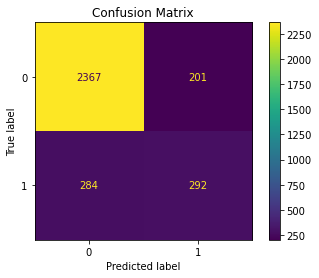

In [ ]:
res_GSA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GSA.best_agent ,classifier='knn', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GSA.f1_score}')
print(f'recall: {res_GSA.recall}')
print(f'precision: {res_GSA.precision}')
print(f'accuracy: {res_GSA.accuracy}')

F1_score: {0: 0.9070703199846715, 1: 0.5463049579045838}
recall: {0: 0.9217289719626168, 1: 0.5069444444444444}
precision: {0: 0.8928706148623161, 1: 0.592292089249493}
accuracy: 0.8457379134860051


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


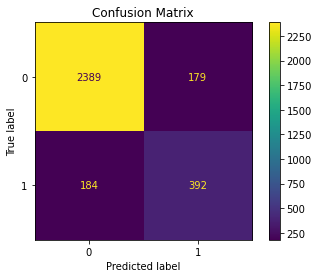

In [ ]:
res_GSA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GSA.best_agent ,classifier='rf', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GSA.f1_score}')
print(f'recall: {res_GSA.recall}')
print(f'precision: {res_GSA.precision}')
print(f'accuracy: {res_GSA.accuracy}')

F1_score: {0: 0.929391169033262, 1: 0.6835222319093286}
recall: {0: 0.9302959501557633, 1: 0.6805555555555556}
precision: {0: 0.9284881461329187, 1: 0.6865148861646234}
accuracy: 0.8845419847328244


EO BASED WRAPPER STARTED

Weight for the classification accuracy [0-1]: 0.9
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 25

------------- Best Agent ---------------
Fitness: 0.8210213752587071
Number of Features: 14323
----------------------------------------

Particle 1 - Fitness: 0.8210213752587071, Number of Features: 14323
Particle 2 - Fitness: 0.8169356746751959, Number of Features: 14141
Particle 3 - Fitness: 0.8143582356639127, Number of Features: 14338
Particle 4 - Fitness: 0.8102832864993065, Number of Features: 14288
Particle 5 - Fitness: 0.8095981155561477, Number of Features: 14484
Particle 6 - Fitness: 0.8072054241440261, Number of Features: 14358
Particle 7 - Fitness: 0.8051942998918843, Number of Features: 14393
Particle 8 - Fitness: 0.8041692469216131, Number of Features: 14281
Particle 9 - Fitness: 0.8035397441917944, Number of Features: 14326
Particle 10 - Fitness: 0.8032318523128463, Number of Features: 14279
Par

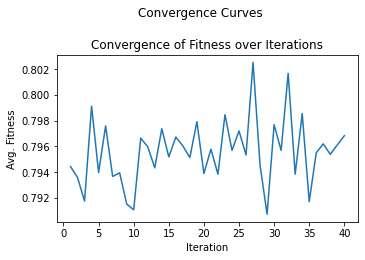

In [ ]:
solution_EO = Py_FS.wrapper.nature_inspired.EO(num_agents = 25, max_iter = 40, train_data = np_tfidf_x, train_label = np_y, save_conv_graph=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


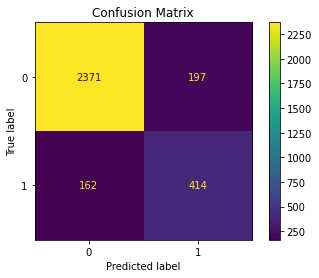

In [ ]:
res_EO = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_EO.best_agent ,classifier='svm', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_EO.f1_score}')
print(f'recall: {res_EO.recall}')
print(f'precision: {res_EO.precision}')
print(f'accuracy: {res_EO.accuracy}')

F1_score: {0: 0.9296216428151343, 1: 0.6975568660488627}
recall: {0: 0.9232866043613707, 1: 0.71875}
precision: {0: 0.9360442163442558, 1: 0.6775777414075287}
accuracy: 0.8858142493638677


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


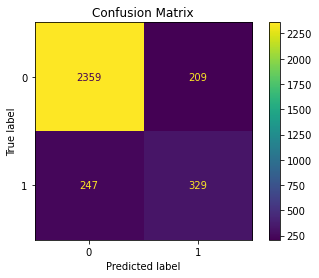

In [ ]:
res_EO = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_EO.best_agent ,classifier='knn', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_EO.f1_score}')
print(f'recall: {res_EO.recall}')
print(f'precision: {res_EO.precision}')
print(f'accuracy: {res_EO.accuracy}')

F1_score: {0: 0.9118670274449169, 1: 0.5906642728904848}
recall: {0: 0.918613707165109, 1: 0.5711805555555556}
precision: {0: 0.9052187260168841, 1: 0.6115241635687733}
accuracy: 0.8549618320610687


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


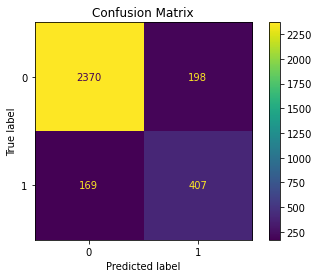

In [ ]:
res_EO = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_EO.best_agent ,classifier='rf', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_EO.f1_score}')
print(f'recall: {res_EO.recall}')
print(f'precision: {res_EO.precision}')
print(f'accuracy: {res_EO.accuracy}')

F1_score: {0: 0.9281378500097905, 1: 0.6892464013547841}
recall: {0: 0.9228971962616822, 1: 0.7065972222222222}
precision: {0: 0.9334383615596692, 1: 0.6727272727272727}
accuracy: 0.8832697201017812
